# Q1. Extract the latent features from a CNN model and plot the latent feature vectors using Keras.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 7s 6ms/step - loss: 0.4991 - accuracy: 0.9152 - val_loss: 0.1018 - val_accuracy: 0.9686
Epoch 2/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0767 - accuracy: 0.9767 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 3/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0736 - val_accuracy: 0.9773
Epoch 4/15
938/938 [==============================] - 5s 6ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0598 - val_accuracy: 0.9821
Epoch 5/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0530 - val_accuracy: 0.9847
Epoch 6/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0486 - val_accuracy: 0.9850
Epoch 7/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0611 - val_accuracy: 0.9836
Epoch 

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-2].output)
latent_features = intermediate_layer_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


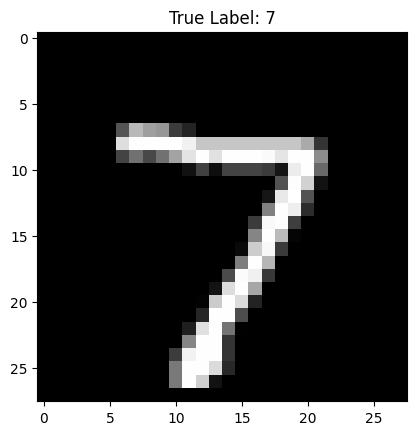

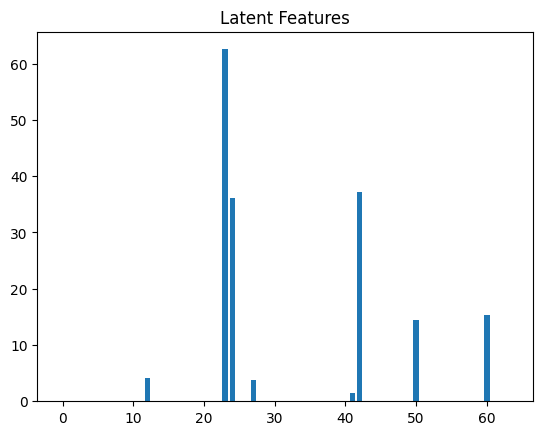

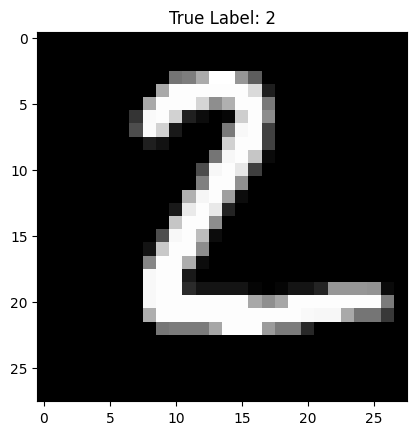

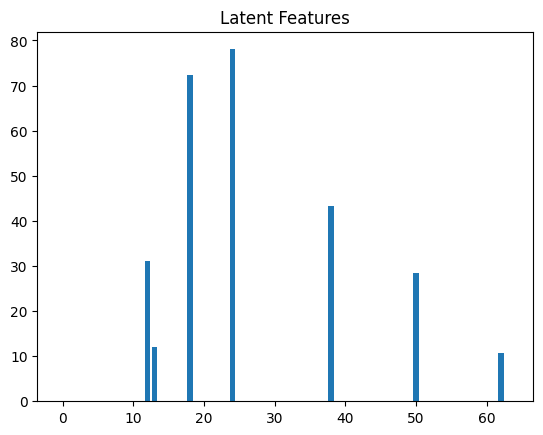

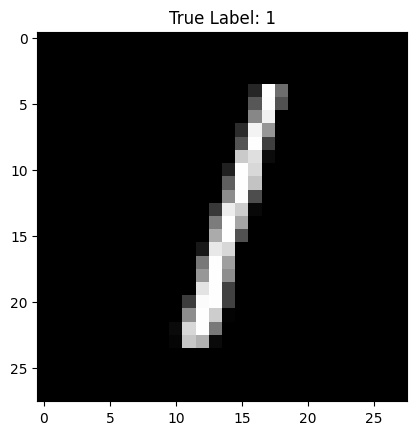

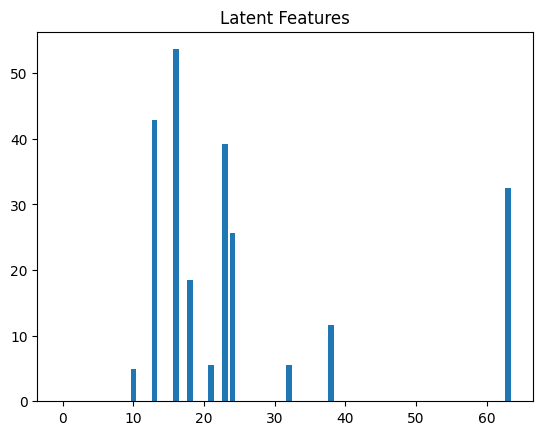

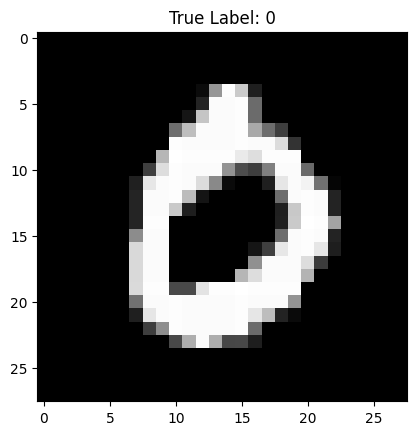

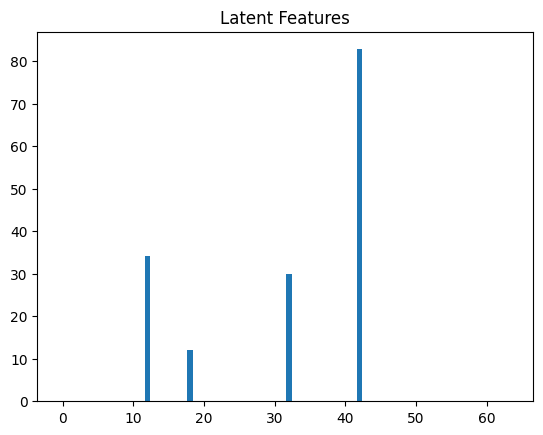

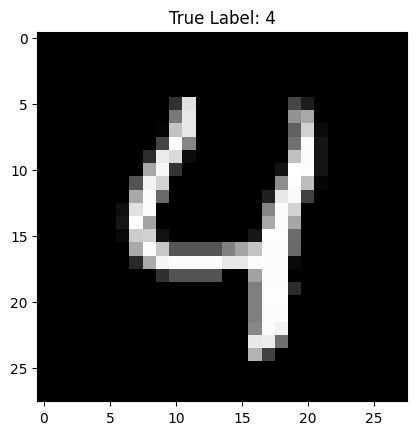

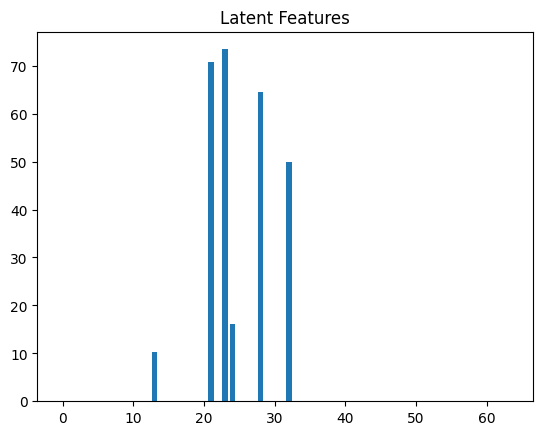

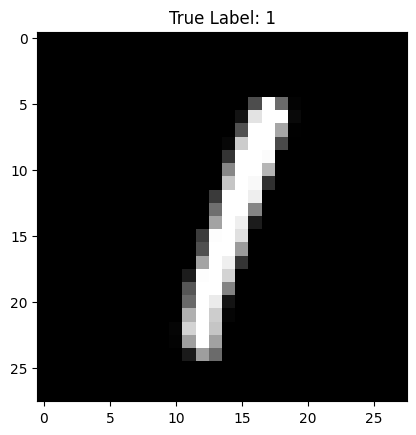

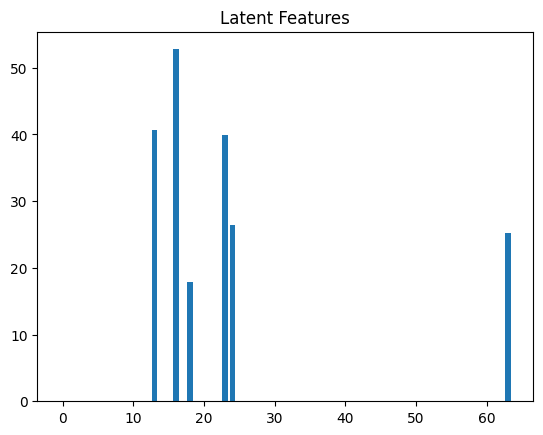

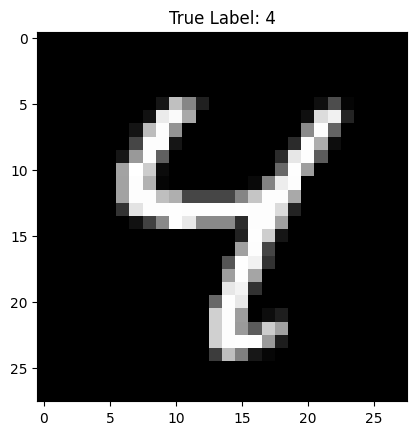

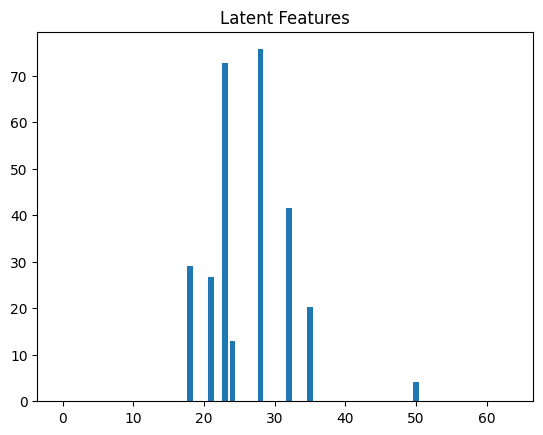

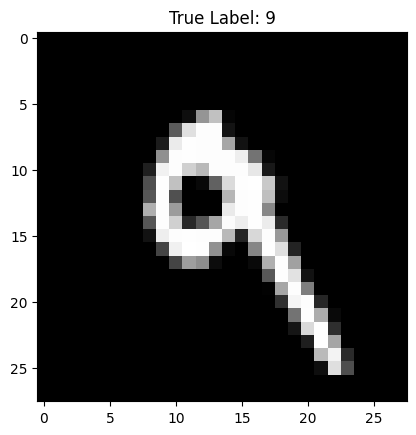

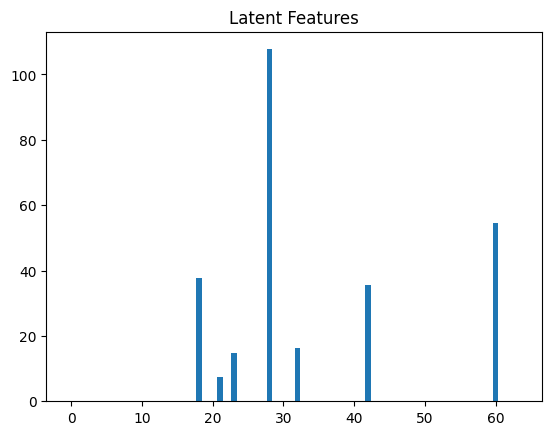

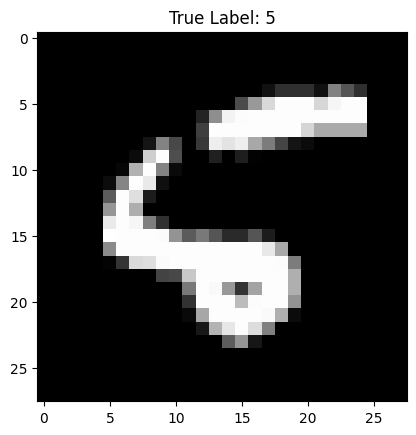

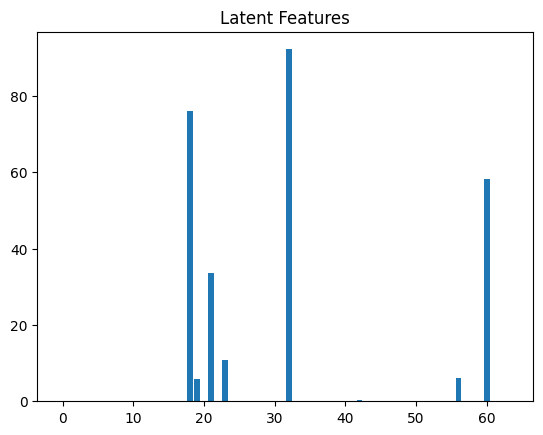

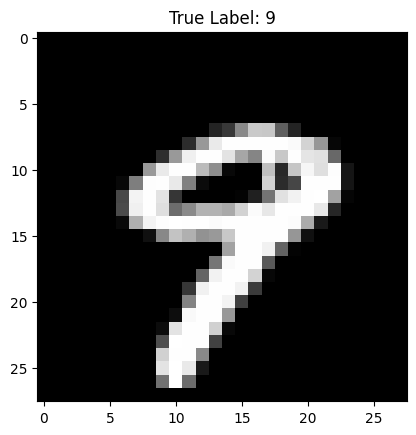

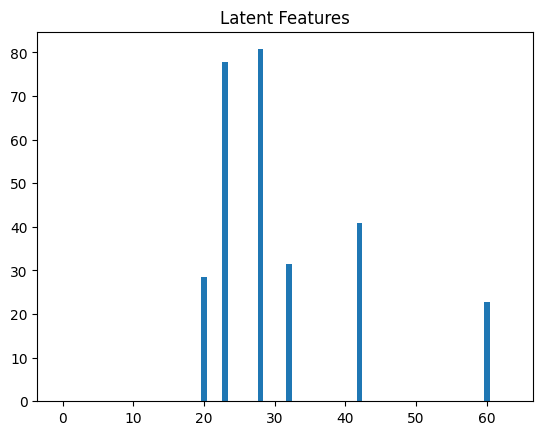

In [ ]:
for i in range(10):  # Plot 10 examples
    plt.figure()
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y_test[i])}")
    plt.show()

    plt.figure()
    plt.bar(range(64), latent_features[i])  # Adjusted the range to match the number of units in the dense layer
    plt.title("Latent Features")
    plt.show()


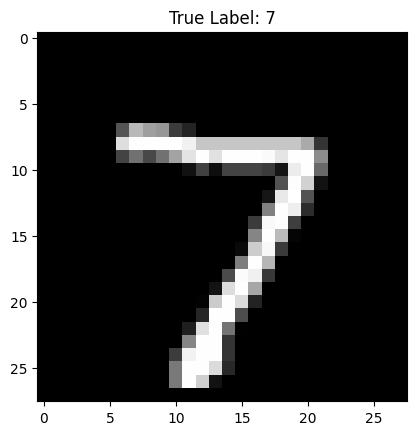

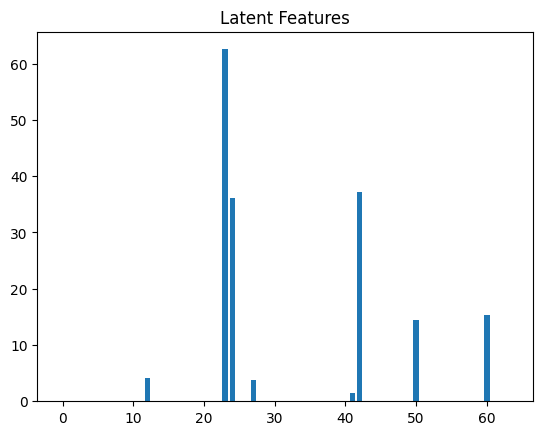

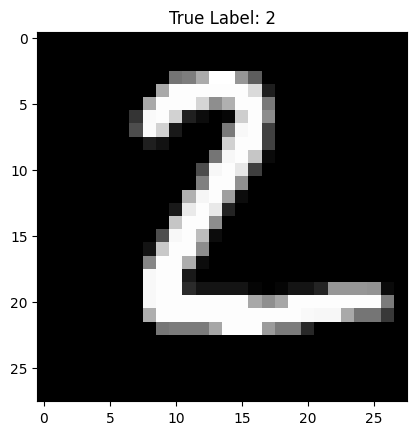

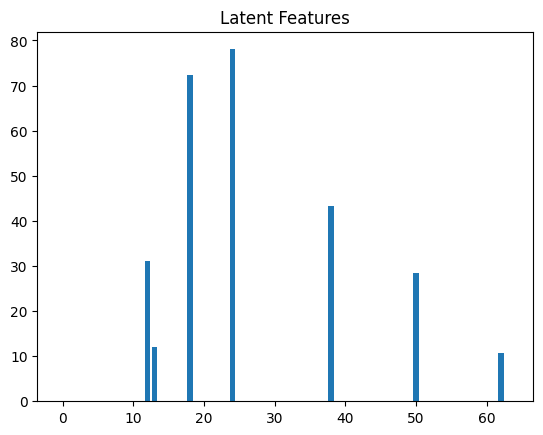

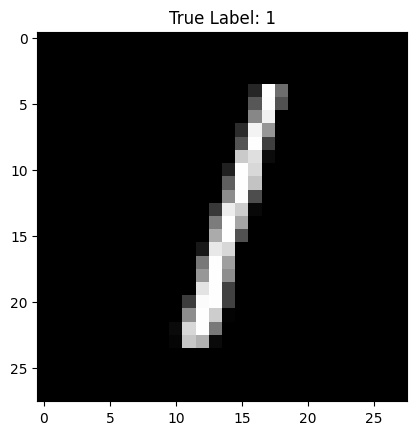

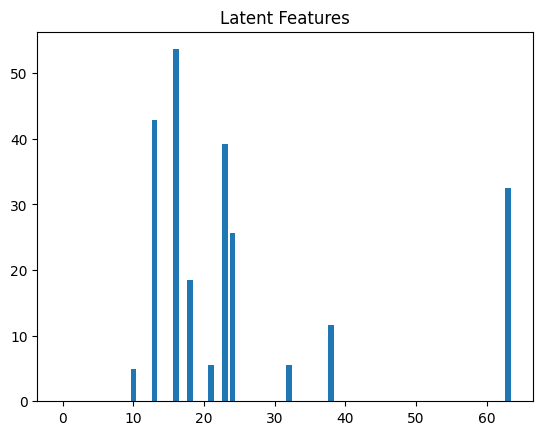

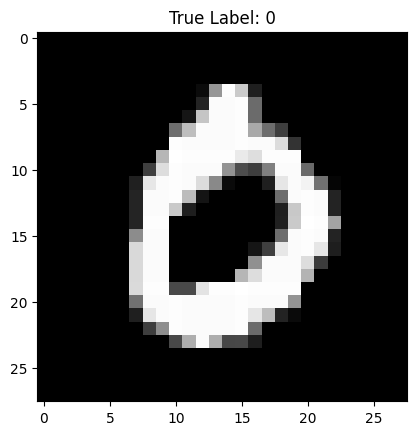

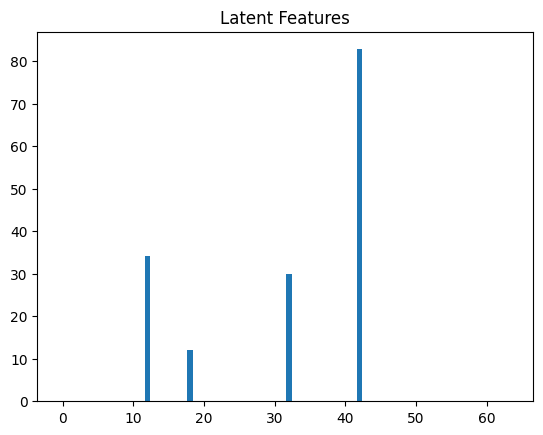

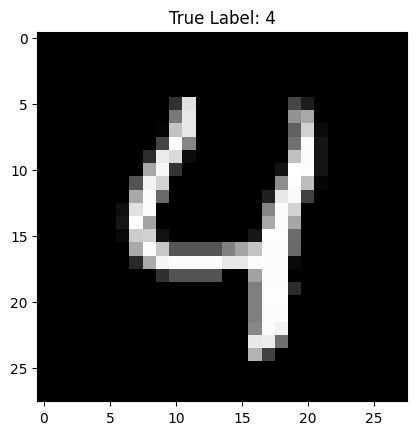

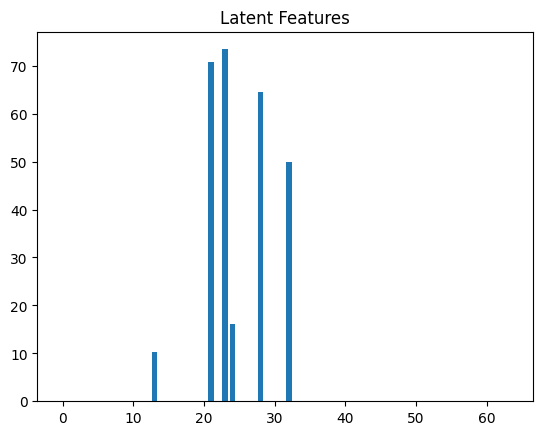

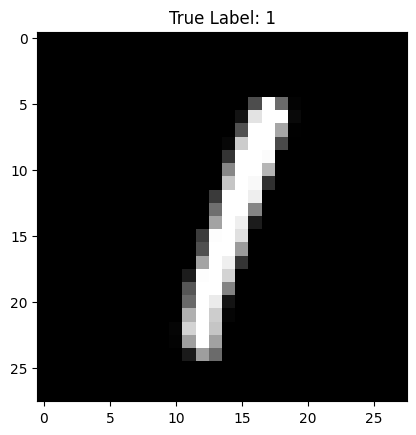

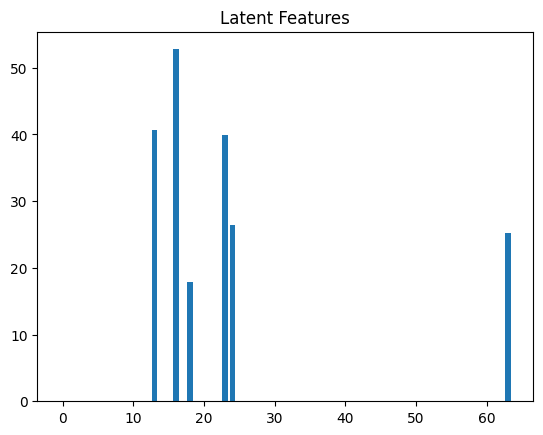

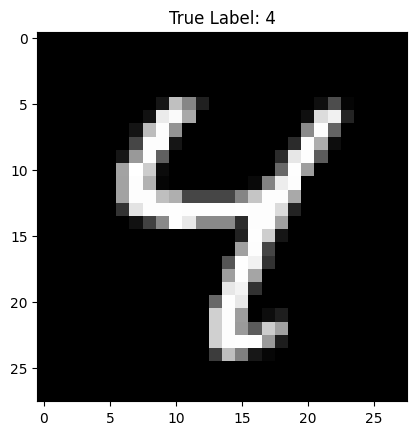

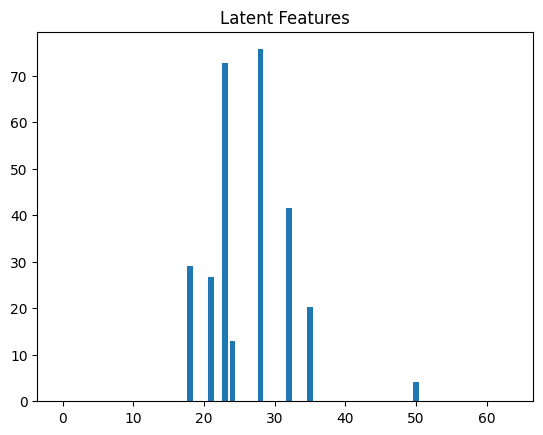

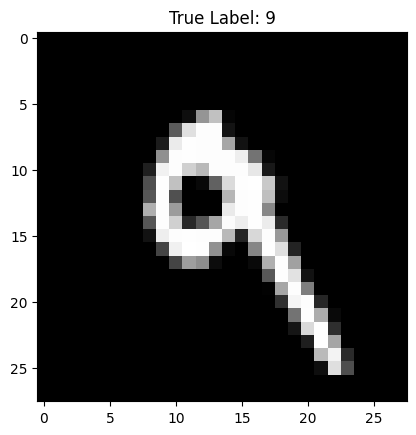

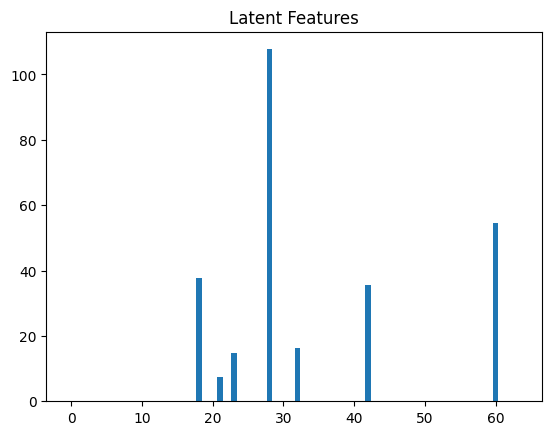

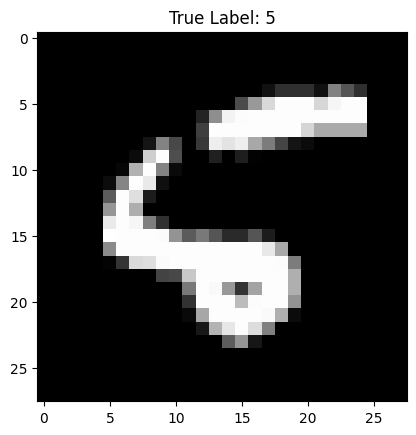

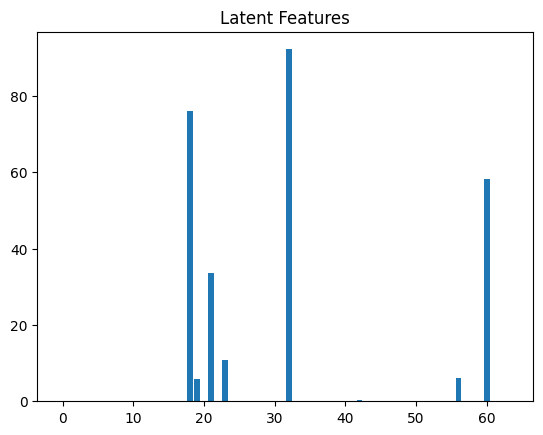

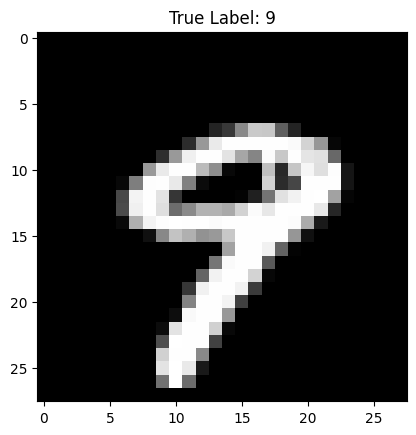

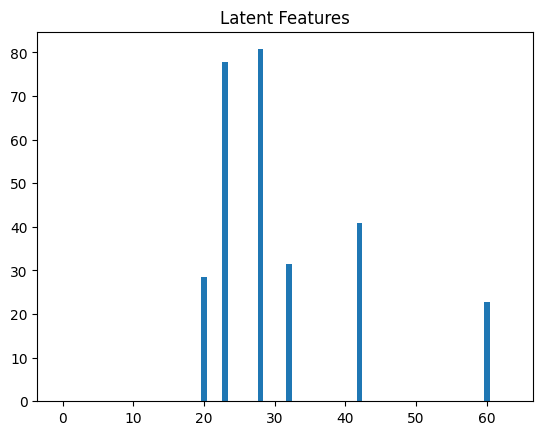

In [ ]:
for i in range(10):  # Plot 10 examples
    plt.figure()
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y_test[i])}")
    plt.show()

    plt.figure()
    plt.bar(range(64), latent_features[i])  # Adjusted the range to match the number of units in the dense layer
    plt.title("Latent Features")
    plt.show()

# Q2. Implement convolution neural network (CNN) for dog/cat classification problem using Keras.

[cat_dog_dataset_kaggle](https://www.kaggle.com/datasets/tongpython/cat-and-dog)


[cat_dog_dataset_github](https://github.com/laxmimerit/dog-cat-full-dataset)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from zipfile import ZipFile
file_name = '/content/archive.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train_dir = '/content/training_set'
validation_dir = '/content/test_set'
image_size = (150, 150)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/20
251/251 [==============================] - 63s 240ms/step - loss: 0.0027 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
251/251 [==============================] - 70s 280ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
251/251 [==============================] - 62s 249ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
251/251 [==============================] - 59s 233ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
251/251 [==============================] - 60s 237ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
251/251 [==============================] - 60s 238ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
251/251 [==============================] - 61s 242ms/step - loss: 0.0000e+0

# Q3. Implement data augmentation for an image with multiple oprations such as scaling, flipping, etc.

---

# New Section

# Q4. To Implement a CNN (faster rcnn model) for object detection in the given image.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
import tensorflow_datasets as tfds
(train_ds, test_ds), dataset_info = tfds.load(
    'coco/2017',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
    data_dir='path/to/coco_dataset',
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)


In [ ]:
backbone = ResNet50(weights='imagenet', include_top=False)

rpn = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(backbone.output)
rpn_class = layers.Conv2D(num_anchors, (1, 1), activation='sigmoid')(rpn)
rpn_bbox = layers.Conv2D(num_anchors * 4, (1, 1))(rpn)

model = Model(inputs=backbone.input, outputs=[rpn_class, rpn_bbox])


In [ ]:
model.compile(
    loss={'rpn_class': rpn_class_loss, 'rpn_bbox': rpn_bbox_loss},
    optimizer=Adam(lr=1e-5),
)


In [ ]:
model.fit_generator(datagen.flow(train_ds, train_targets), epochs=10)